In [55]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn import preprocessing
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

In [56]:
dataDF = pd.read_csv('AAPL.csv')

## Splitting data

In [69]:
'''
training ----> start : 2017/11/1
validation ----> 2017/11/1 : 2018/4/1
test ----> 2018/4/1 : end
'''
train_split_time = pd.datetime(2017,11,1)
val_split_time = pd.datetime(2018,4,1)

train_data = dataDF.loc[pd.to_datetime(dataDF['Date']) <= train_split_time]
val_data = dataDF.loc[(pd.to_datetime(dataDF['Date']) > train_split_time) & (pd.to_datetime(dataDF['Date']) <= val_split_time)]
test_data = dataDF.loc[pd.to_datetime(dataDF['Date']) > val_split_time]

In [70]:
test_data.shape

(92, 7)

## exploring training data

In [4]:
Adj_close = train_data['Adj Close']
trace1 = go.Scatter(
                    x = train_data.Date,
                    y = train_data.Close,
                    mode = "lines",
                    name = "Close",
                    marker = dict(color = '#17BECF'))

trace2 = go.Scatter(
                    x = train_data.Date,
                    y = Adj_close,
                    mode = "lines",
                    name = "Adj Close",
                    marker = dict(color = '#7F7F7F'))
data = [trace1, trace2]
layout = dict(title = 'Close  vs Adj Close prices vs date',
              xaxis= dict(title= 'Date',ticklen= 5,zeroline= True))
fig = dict(data = data, layout = layout)
iplot(fig,filename="Close and Adj Close prices")

## Normalizing data

In [72]:
'''
predicted_days = 1

openCol = train_data.Open
closeCol = train_data.Close 

closeCol_shifted = closeCol.shift(-1) 

mydata = pd.concat([openCol, closeCol, closeCol_shifted], axis=1)
mydata.columns = ['open','close','closeCol_shifted']

mydata = mydata.dropna()
y = mydata['closeCol_shifted']
cols = ['open','close']
x = mydata[cols]



scaler_x = preprocessing.MinMaxScaler(feature_range=(-1,1))
x = np.array(x).reshape((len(x),len(cols)))
x = scaler_x.fit_transform(x)

scaler_y = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = np.array(y)
y = scaler_y.fit_transform(y)
y= y.ravel()
'''
def generate_data(train_data, test_data, predicted_days):
    '''
    this function takes train data, train labels, test data and test labels
    to predict output and compare it to
    '''
    Open = train_data.Open
    Close = train_data.Close 
    close_shifted = Close.shift(-predicted_days) 
    data = pd.concat([Open, Close, close_shifted], axis=1)
    data.columns = ['open','close','close_shifted']
    data = data.dropna()
    y_train = data['close_shifted']
    cols = ['open','close']
    X_train = data[cols]
    
    Open = test_data.Open
    Close = test_data.Close 
    close_shifted = Close.shift(-predicted_days) 
    data = pd.concat([Open, Close, close_shifted], axis=1)
    data.columns = ['open','close','close_shifted']
    data = data.dropna()
    y_test = data['close_shifted']
    cols = ['open','close']
    X_test = data[cols]
    
    scaler_x = preprocessing.MinMaxScaler(feature_range=(-1,1))
    X_train = np.array(X_train).reshape((len(X_train),len(cols)))
    X_train = scaler_x.fit_transform(X_train)
    X_test = np.array(X_test).reshape((len(X_test),len(cols)))
    X_test = scaler_x.fit_transform(X_test)
    
    scaler_y = preprocessing.MinMaxScaler(feature_range=(-1,1))
    y_train = np.array(y_train).reshape(len(y_train),1)
    y_train = scaler_y.fit_transform(y_train)
    #y_train = y_train.ravel()
    y_test = np.array(y_test).reshape(len(y_test),1)
    y_test = scaler_y.fit_transform(y_test)
    #y_test = y_test.ravel()
    
    return X_train, X_test, y_train, y_test



In [73]:
X_train, X_test, y_train, y_test = generate_data(train_data,test_data, predicted_days=1)


In [74]:
X_test.shape

(91, 2)

## Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train,y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


Training set score: 1.00
Test set score: 0.94


In [77]:
from sklearn.linear_model.stochastic_gradient import SGDRegressor
cln = SGDRegressor()
cln.fit(X_train,y_train)
y_pred = cln.predict(X_test)
print("Test set score: {:.2f}".format(cln.score(X_test, y_test)))

Test set score: 0.92


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

ValueError: continuous is not supported

In [48]:
cln.fit(X_train,y_train)

/home/eslam/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [82]:
y_pred

array([-0.79381373, -0.73807509, -0.72826247, -0.54594545, -0.67004252,
       -0.65795683, -0.52806351, -0.56053812, -0.50131706, -0.46108205,
       -0.43349177, -0.35369234, -0.33488794, -0.52176497, -0.73245238,
       -0.81960116, -0.8907796 , -0.93864609, -0.89615905, -0.9377806 ,
       -0.91550171, -0.74864558, -0.41393445, -0.39401877, -0.20240561,
       -0.03298188, -0.0185305 ,  0.0404387 ,  0.12006418,  0.12603798,
        0.10713229,  0.0261888 ,  0.04750424,  0.06252577,  0.03191097,
        0.07571742,  0.07381686,  0.05695231,  0.10221438,  0.10001182,
        0.07308573,  0.06730001,  0.04406834,  0.12930983,  0.23687866,
        0.29668808,  0.32197357,  0.3217064 ,  0.22456772,  0.21856881,
        0.24103097,  0.22957082,  0.21380416,  0.14225656,  0.09613776,
       -0.02287714,  0.01861404,  0.01562046, -0.0186663 , -0.13108761,
       -0.09290619, -0.05256918, -0.04810504, -0.01126636, -0.01921484,
       -0.00505658, -0.02639581,  0.02985587,  0.16726073,  0.18

In [50]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))
#print("Test set score: {:.2f}".format(cln.score(X_test, y_test)))

Test set score: 0.00


In [30]:
print 'training data: ', x.shape 
print 'test data: ', y.shape

training data:  (1066, 2)
test data:  (1066,)


In [31]:
y

array([-0.95297063, -0.89238369, -0.8680233 , ...,  0.95569877,
        1.        ,  0.95894495])

In [ ]:
def model(X_train,Y_train,x_train,y_train):
    '''
    this function takes train data, train labels, test data and test labels
    to predict output and compare it to
    '''
    

In [2]:
import matplotlib.pyplot as plt
import datetime as dt

In [16]:
x = np.array(x).reshape((len(x),len(cols)))
x.shape

(1066, 2)

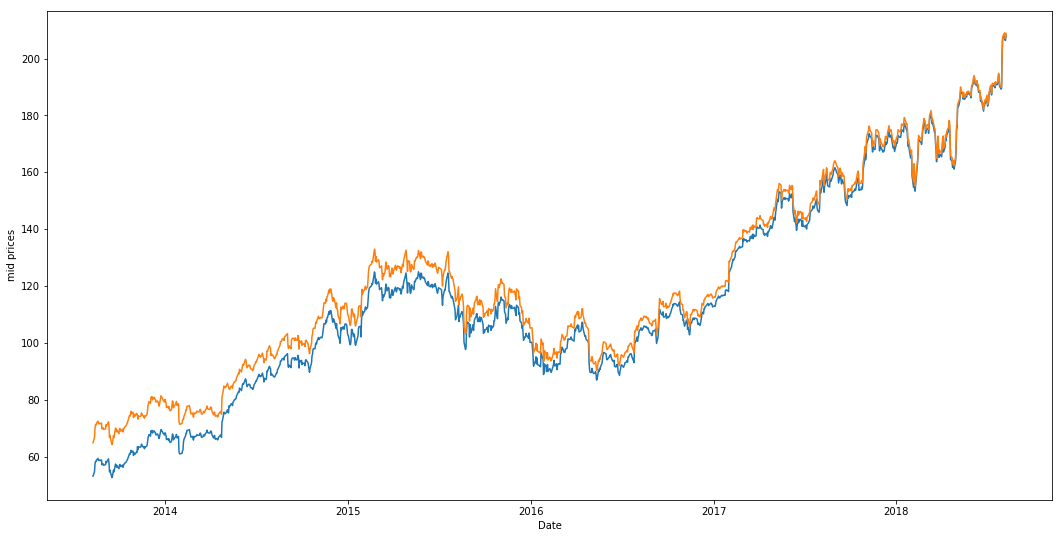

In [10]:
plt.figure(figsize = (18,9))
plt.plot(pd.to_datetime(data['Date']),data['Adj Close'])
plt.hold
plt.plot(pd.to_datetime(data['Date']),data['Close'])
#plt.xticks(range(0,data.shape[0],120),data['Date'].loc[::120],rotation=45)
plt.xlabel('Date')
plt.ylabel('mid prices')
plt.legend
plt.show()

In [16]:
range(0,20,2)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]